In [ ]:
from datetime import datetime, timedelta
import requests
import pandas as pd
import yfinance as yf
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

2022-12-12 00:59:11.296407: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
companie = yf.Ticker("AMZN")
stock = companie.history(
    start=("2017-12-08"),
    end= ("2022-12-08"),
    #interval='60m'
).reset_index()
print(stock)

                          Date       Open       High        Low      Close  \
0    2017-12-08 00:00:00-05:00  58.520000  58.639500  57.855000  58.099998   
1    2017-12-11 00:00:00-05:00  58.230000  58.494999  57.849998  58.445999   
2    2017-12-12 00:00:00-05:00  58.325500  58.680000  58.080502  58.254002   
3    2017-12-13 00:00:00-05:00  58.500000  58.543499  58.013500  58.206501   
4    2017-12-14 00:00:00-05:00  58.185501  58.896500  58.122501  58.713001   
...                        ...        ...        ...        ...        ...   
1253 2022-12-01 00:00:00-05:00  96.989998  97.230003  94.919998  95.500000   
1254 2022-12-02 00:00:00-05:00  94.480003  95.360001  93.779999  94.129997   
1255 2022-12-05 00:00:00-05:00  93.050003  94.059998  90.820000  91.010002   
1256 2022-12-06 00:00:00-05:00  90.500000  91.040001  87.900002  88.250000   
1257 2022-12-07 00:00:00-05:00  88.339996  89.889999  87.480003  88.459999   

        Volume  Dividends  Stock Splits  
0     61002000       

In [ ]:
values

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-12-08 00:00:00-05:00,58.520000,58.639500,57.855000,58.099998,61002000,0,0.0
1,2017-12-11 00:00:00-05:00,58.230000,58.494999,57.849998,58.445999,47270000,0,0.0
2,2017-12-12 00:00:00-05:00,58.325500,58.680000,58.080502,58.254002,44718000,0,0.0
3,2017-12-13 00:00:00-05:00,58.500000,58.543499,58.013500,58.206501,52336000,0,0.0
4,2017-12-14 00:00:00-05:00,58.185501,58.896500,58.122501,58.713001,64286000,0,0.0
...,...,...,...,...,...,...,...,...
1253,2022-12-01 00:00:00-05:00,96.989998,97.230003,94.919998,95.500000,68488000,0,0.0
1254,2022-12-02 00:00:00-05:00,94.480003,95.360001,93.779999,94.129997,72427000,0,0.0
1255,2022-12-05 00:00:00-05:00,93.050003,94.059998,90.820000,91.010002,71535500,0,0.0
1256,2022-12-06 00:00:00-05:00,90.500000,91.040001,87.900002,88.250000,75503600,0,0.0


In [ ]:
training_data_len = math.ceil(len(stock)* 0.8)
dataset_train = stock.iloc[0:training_data_len, :]

In [ ]:
dataset_train

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-12-08 00:00:00-05:00,58.520000,58.639500,57.855000,58.099998,61002000,0,0.0
1,2017-12-11 00:00:00-05:00,58.230000,58.494999,57.849998,58.445999,47270000,0,0.0
2,2017-12-12 00:00:00-05:00,58.325500,58.680000,58.080502,58.254002,44718000,0,0.0
3,2017-12-13 00:00:00-05:00,58.500000,58.543499,58.013500,58.206501,52336000,0,0.0
4,2017-12-14 00:00:00-05:00,58.185501,58.896500,58.122501,58.713001,64286000,0,0.0
...,...,...,...,...,...,...,...,...
1002,2021-12-02 00:00:00-05:00,173.000000,174.634995,171.187500,171.867996,64726000,0,0.0
1003,2021-12-03 00:00:00-05:00,172.750000,173.493500,166.929993,169.489502,80712000,0,0.0
1004,2021-12-06 00:00:00-05:00,169.649994,173.695496,166.934494,171.368500,68860000,0,0.0
1005,2021-12-07 00:00:00-05:00,174.600006,177.499496,173.334503,176.164505,66410000,0,0.0


In [ ]:
dataNum = 5
timesteps = 20
epochNum = 200

In [ ]:
training_set = dataset_train.iloc[:,1:dataNum+1]

In [ ]:
training_set

,Open,High,Low,Close,Volume
0,58.520000,58.639500,57.855000,58.099998,61002000
1,58.230000,58.494999,57.849998,58.445999,47270000
2,58.325500,58.680000,58.080502,58.254002,44718000
3,58.500000,58.543499,58.013500,58.206501,52336000
4,58.185501,58.896500,58.122501,58.713001,64286000
...,...,...,...,...,...
1002,173.000000,174.634995,171.187500,171.867996,64726000
1003,172.750000,173.493500,166.929993,169.489502,80712000
1004,169.649994,173.695496,166.934494,171.368500,68860000
1005,174.600006,177.499496,173.334503,176.164505,66410000


In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


X_train = []
Y_train = []
for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps:i, 0:dataNum])    
    Y_train.append(training_set_scaled[i, 0])                        
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
len(Y_train)

987

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], dataNum))

In [ ]:
X_train.shape

(987, 20, 5)

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 32, input_shape = (X_train.shape[1], dataNum), return_sequences = True))
regressor.add(LSTM(units = 16))
regressor.add(Dense(units = 1))

2022-12-12 01:01:33.527841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 32)            4864      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 8,017
Trainable params: 8,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.fit(X_train, Y_train, batch_size = 32, epochs = epochNum)

Epoch 1/200
31/31 [==============================] - 4s 10ms/step - loss: 0.0471
Epoch 2/200
31/31 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 3/200
31/31 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 4/200
31/31 [==============================] - 0s 11ms/step - loss: 0.0013
Epoch 5/200
31/31 [==============================] - 0s 11ms/step - loss: 0.0013
Epoch 6/200
31/31 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 7/200
31/31 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 8/200
31/31 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 9/200
31/31 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 10/200
31/31 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 11/200
31/31 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 12/200
31/31 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 13/200
31/31 [=====

In [ ]:
dataset_test = stock.iloc[training_data_len-60: , : ]
real_stock_price = dataset_test.iloc[:,1:dataNum+1].values
lenOfReal = len(real_stock_price)
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs.shape

(311, 5)

In [ ]:
real_stock_price

array([[1.72126007e+02, 1.74270996e+02, 1.70100494e+02, 1.73789505e+02,
        5.91500000e+07],
       [1.72998001e+02, 1.74627502e+02, 1.72307007e+02, 1.74412003e+02,
        5.16720000e+07],
       [1.74420502e+02, 1.74870499e+02, 1.72606506e+02, 1.73126007e+02,
        9.23320000e+07],
       ...,
       [9.30500031e+01, 9.40599976e+01, 9.08199997e+01, 9.10100021e+01,
        7.15355000e+07],
       [9.05000000e+01, 9.10400009e+01, 8.79000015e+01, 8.82500000e+01,
        7.55036000e+07],
       [8.83399963e+01, 8.98899994e+01, 8.74800034e+01, 8.84599991e+01,
        6.80869000e+07]])

In [ ]:
inputs_test = []
for i in range(timesteps, len(inputs)):
  inputs_test.append(inputs[i-timesteps:i, 0:dataNum])
inputs_test = np.array(inputs_test)
inputs_test = np.reshape(inputs_test, (inputs_test.shape[0], inputs_test.shape[1], dataNum))
predicted_stock_price = regressor.predict(inputs_test)
predicted_stock_price = np.pad(predicted_stock_price,((0,0),(0,dataNum-1)),'constant') 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = np.delete(predicted_stock_price, [1, 2, 3, 4], axis=1)

10/10 [==============================] - 1s 4ms/step


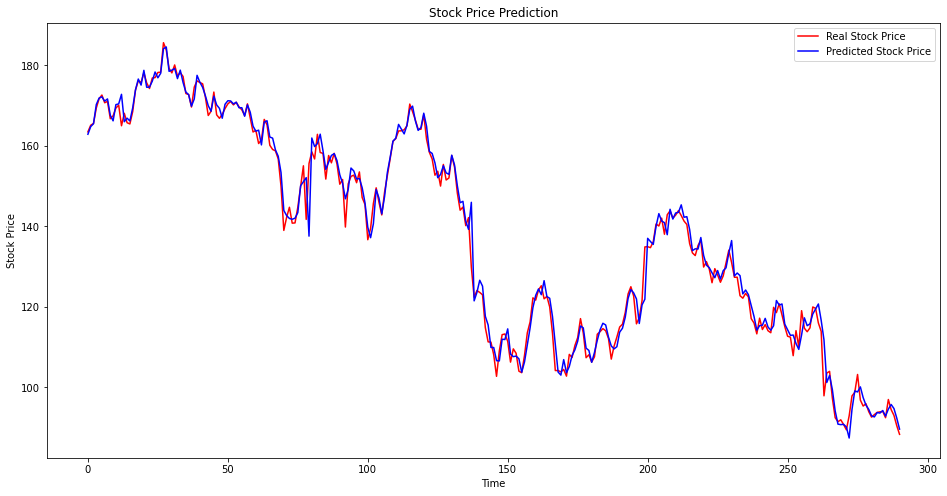

In [ ]:
real_stock_price = dataset_test.iloc[timesteps:lenOfReal+1,1:2].values
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.show()
#plt.savefig('pic1.png')


In [ ]:
real_stock_price_train = dataset_train
real_stock_price_train = real_stock_price_train.iloc[timesteps:len(real_stock_price_train)+1,1:2].values

31/31 [==============================] - 0s 4ms/step


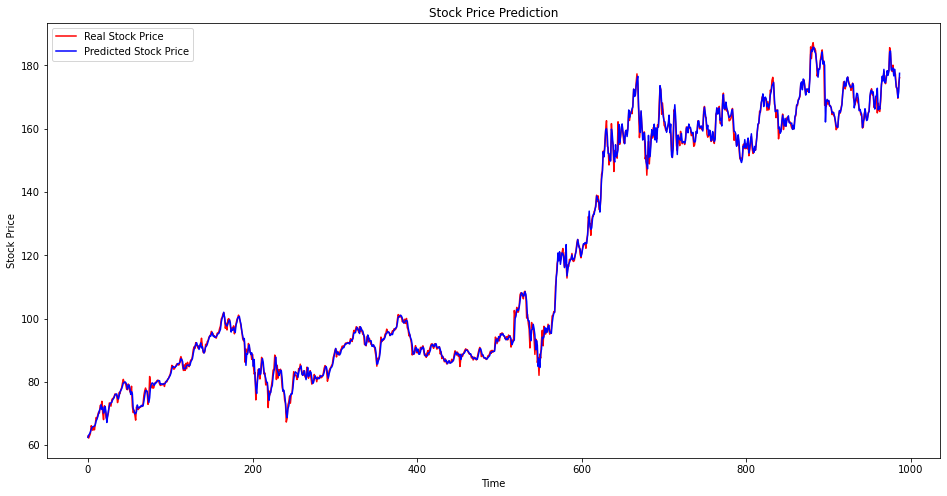

<Figure size 432x288 with 0 Axes>

In [ ]:
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = np.pad(predicted_stock_price_train,((0,0),(0,dataNum-1)),'constant')
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)
predicted_stock_price_train = np.delete(predicted_stock_price_train, [1, 2, 3, 4], axis=1)

#np.savetxt(stockID + '.csv', predicted_stock_price, fmt="%.3f", delimiter=",")
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.plot(real_stock_price_train, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.show()
plt.savefig('pic2.png')

In [ ]:
from sklearn.metrics import mean_squared_error

rmseTest = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print("RMSE_test = " + str(rmseTest))
rmseTrain = math.sqrt(mean_squared_error(real_stock_price_train, predicted_stock_price_train))
print("RMSE_train = " + str(rmseTrain))

RMSE_test = 2.793533550091309
RMSE_train = 1.4666726333218219
